공공 데이터의 기상자료(서울의 기온 변화)를 csv 파일로 얻어와서,
데이터를 분석해보고,
시각화를 해보자...

csv 파일윽 읽어와 출력해보자.

In [1]:
import csv
file = open('seoultemp.csv','r', encoding = 'utf-8')

data = csv.reader(file, delimiter=',')

print(data)

file.close()

In [ ]:
import csv
file = open('seoultemp.csv','r', encoding = 'utf-8')

data = csv.reader(file, delimiter=',')

for row in data: # data 에서 한  row를 읽어 그 row가 있을 동안 반복
     print(row)

file.close()

제목 헤더까지 함께 출력된 것을 볼 수 있다.
하지만 , 데이터 분석이나 시각화를 하기 위해서는 헤더는 필요하지 않다.
헤더를 제외한 순수 데이터만 출력 해보자.

In [ ]:
import csv
file = open('seoultemp.csv','r', encoding = 'utf-8')


data = csv.reader(file, delimiter=',')
header = next(data) # 다음 로우로 건너 뛰어라
for row in data: # data 에서 한  row를 읽어 그 row가 있을 동안 반복
     print(row)

file.close()


문제) 기온 관측상 서울에서 가장 더웠던 날과 그 날의 최고 기온을 출력해보자.
기온 관측상 서울에서 가장 추웠던 날과 그 날의 최저 기온을 출력해보자.


위의 문제를 풀기 위해서는 원시 데이터를 선처리 해줘야 한다.
1) 6.25 전쟁시 기온 관측을 하지 못한 날짜에 대해서 선처리 작업.
2) 날짜데이터 앞에 tab('\t')를 대한 처리.
3) 기온 데이터가 문자열 타입이므로 실수 타입으로 변환.

위와 같이 원시 데이터를 전처리 하는 작업을 데이터 정제화(내가 사용할 데이터 형식으로 가공 처리 하는 것) 작업이라 한다.

In [ ]:
import csv
file = open('seoultemp.csv','r', encoding = 'utf-8')


data = csv.reader(file, delimiter=',')
header = next(data) # 다음 로우로 건너 뛰어라
for row in data: # data 에서 한  row를 읽어 그 row가 있을 동안 반복
    print(row[-1]) #역순이 된다 즉 뒤에부터
    row[0] = row[0].replace('\t','') # tab(\t)을 빈 문자열로 변환
    if row[-1] == '' :
        row[-1] = -9999 # 최고 기온의 값이 누락되어 있을 경우 -9999로 대체
    row[-1] = float(row[-1]) # 최고 기온을 float 로 변환 
    print(row)

    if row[3] == '':
        row[3] = 9999
    row[3] = float(row[3]) # 최저 기온을 float 로 변환
    print(row)

file.close()

데이터 전처리 작업을 완료 했으므로, 최저 기온과 최고 기온을 찾아보자.

In [15]:
import csv
file = open('seoulTemp.csv','r', encoding='utf-8')

data = csv.reader(file, delimiter=',')
header = next(data)

max_temp = -9999
min_temp = 9999

max_date = ''
min_date = ''

for row in data:     # 데이터에서 한 row를 읽어 그 row가 있을 동안 반복
    row[0] = row[0].replace('\t','')
    if row[-1] == '' :
        row[-1] = -9999   # 최고기온의 값이 누락 되어 있을 경우 -9999로 대체
    row[-1] = float(row[-1])  # 최고기온을 float로 변환
    if row[3] == '' :
        row[3] = 9999
    row[3] = float(row[3])  
    
    if row[-1] > max_temp:   # 최고기온과 최고기온을 찍었던 날짜를 저장
        max_temp = row[-1]
        max_date = row[0]
    
    if row[3] < min_temp:    # 최저기온과 최저기온을 찍었던 날짜를 저장
        min_temp = row[3]
        min_date = row[0]
print("최고 더웠던 날은 %s 이머, 그날의 최고기온은 %f 입니다" % (max_date, max_temp))
print("최고 추웠던 날은 %s 이머, 그날의 최저기온은 %f 입니다" % (min_date, min_temp))
file.close()

최고 더웠던 날은 2018-08-01 이머, 그날의 최고기온은 39.600000 입니다
최고 추웠던 날은 1927-12-31 이머, 그날의 최저기온은 -23.100000 입니다


문제) 서울의 최고기온을 기준으로 내림차순 정렬하여 출력하세요....reverse()

In [61]:
import csv
file = open('seoulTemp.csv','r', encoding='utf-8')

data = csv.reader(file, delimiter=',')
header = next(data)

maxTempList = []

for row in data:     # 데이터에서 한 row를 읽어 그 row가 있을 동안 반복
    row[0] = row[0].replace('\t','')
    if row[-1] == '' :
        row[-1] = -9999   # 최고기온의 값이 누락 되어 있을 경우 -9999로 대체
    row[-1] = float(row[-1])  # 최고기온을 float로 변환
    if row[3] == '' :
        row[3] = 9999
    row[3] = float(row[3])  

    maxTempList.append(row[-1])

print(maxTempList)

maxTempList.sort() # 오름차순 정렬
maxTempList.reverse() # 내림차순 정렬 

print(maxTempList)

file.close()

[20.7, 22.0, 21.3, 22.0, 25.4, 21.3, 16.1, 14.9, 21.1, 24.1, 20.4, 17.4, 21.3, 20.6, 20.9, 20.2, 21.6, 20.9, 21.3, 22.7, 19.9, 19.6, 16.3, 17.1, 18.7, 18.2, 20.7, 19.6, 20.0, 20.1, 20.3, 21.3, 21.1, 11.1, 13.6, 17.0, 18.1, 12.4, 9.4, 11.9, 13.2, 13.4, 14.9, 16.4, 15.2, 17.6, 12.6, 11.7, 6.7, 4.3, 7.1, 6.2, 11.2, 9.9, 5.9, -0.7, 1.5, 1.9, 2.0, 2.9, -2.4, 1.4, 3.4, 6.1, 1.3, 2.6, 5.8, 1.9, 6.6, 8.1, 4.3, 0.6, 3.8, 9.0, 6.4, -5.1, -2.4, -2.1, -0.4, -0.2, 1.9, -8.1, -10.2, -9.4, 0.9, 6.8, 6.4, -0.7, -1.9, -4.4, -6.1, -2.1, -1.3, -3.0, -2.9, -1.7, -0.1, 2.9, -1.2, -0.9, 2.0, 3.3, 4.8, 4.5, 4.7, 0.1, 0.9, -4.5, -3.6, 2.8, 2.8, 2.3, -6.1, -5.1, -2.7, 0.1, 0.3, -0.6, 0.0, -1.3, 0.8, 0.8, 6.2, 1.6, -0.2, -5.4, -4.1, -5.5, -5.7, -3.7, 1.3, -4.1, -2.5, -2.8, -1.2, 1.3, 2.3, 2.0, -1.4, -1.6, 0.3, 5.5, 7.3, 5.1, 5.4, 2.7, 1.7, 0.8, 4.1, 8.4, 6.3, 5.6, 4.0, 0.1, 4.9, 4.0, 7.9, 7.9, 2.2, 1.9, 1.5, 1.5, 1.8, 2.6, 3.8, 6.7, 11.8, 13.5, 15.7, 10.7, 7.9, 4.3, 6.0, 12.5, 17.0, 14.7, 11.4, 7.4, 8.0, 15.5, 

문제. seoulTemp.csv 파일을 읽어서, 2024년 7월의 최고기온을 빨간색 선그래프로, 2024년 7월의 최저기온을 파란색 선그래프로 2024년 7월의 평균기온을 초록색 선그래프로 출력하세요.

1) csv 파일을 읽는다.
2) 원하는 날짜인지 확인한다.
3) 원하는 날짜일때 최고기온, 최저기온, 평균 기온의 값을 각각 다른 리스트에 저장한다.
4) matplotlib.pyplot을 이용하여 차트를 그린다.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


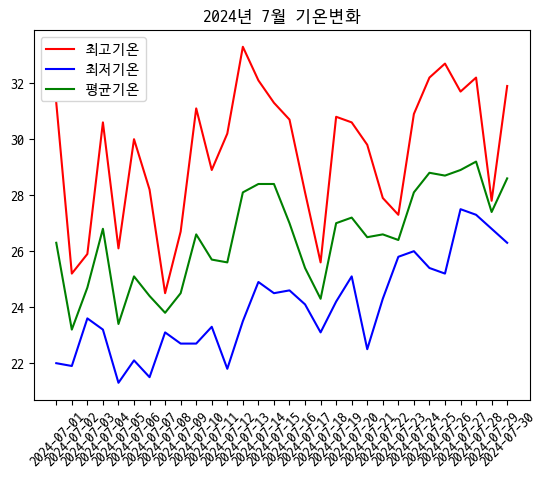

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

file = open('seoulTemp.csv','r', encoding='utf-8')

data = csv.reader(file, delimiter=',')
header = next(data)


minTempList = []
maxTempList = []
avgTempList = []
dateList = []

for row in data : 
    row[0] = row[0].replace('\t','')
    if row[0].startswith('2024-07') :
        dateList.append(row[0])
        maxTempList.append(float(row[-1]))
        minTempList.append(float(row[3]))
        avgTempList.append(float(row[2]))
file.close()



plt.rcParams['font.family'] ='D2Coding' # 폰트 설정(한글을 사용하려면 반드시 폰트를 지정해줘야 한다.)
plt.title('2024년 7월 기온변화')
plt.plot(maxTempList, color='red', label='최고기온')
plt.plot(minTempList, color='blue', label='최저기온') 
plt.plot(avgTempList, color='green', label='평균기온') 

plt.xticks(np.arange(len(dateList)), dateList, rotation=45)


print(np.arange(len(dateList)))

plt.legend()
plt.show()

문제) seoulTemp.csv 파일을 읽어서 , 원하는 날짜의 최고 기온, 최저기온 그래프를 그리세요.
1907년 부터 2023년 까지, 만약 해당 일의 데이터가 없다면 그래프로 그리지 않는다.


문제. seoulTemp.csv 파일을 읽어서, 1월과 8월의 최고기온을 각각 히스토그램 차트로 출력해보자.

3534 3503
[29.6, 30.7, 32.0, 31.5, 32.4, 33.6, 30.9, 29.5, 26.7, 26.8, 30.5, 30.5, 29.0, 28.9, 30.4, 31.7, 32.0, 33.3, 32.5, 33.5, 31.1, 26.7, 26.1, 27.5, 23.9, 21.3, 23.3, 26.0, 27.7, 27.9, 27.2, 32.3, 27.5, 31.7, 33.2, 34.5, 31.7, 30.2, 35.6, 34.8, 33.0, 30.8, 27.8, 24.8, 23.9, 23.8, 25.3, 27.3, 28.3, 30.3, 30.3, 30.0, 30.0, 27.7, 30.9, 25.3, 26.8, 29.1, 30.5, 30.6, 29.5, 26.5, 32.0, 31.6, 31.4, 31.2, 32.0, 29.9, 29.0, 30.3, 30.6, 30.6, 31.5, 31.0, 30.6, 29.5, 27.4, 28.1, 27.4, 28.4, 25.2, 29.5, 26.5, 29.0, 28.9, 29.0, 31.5, 31.2, 26.0, 23.9, 27.8, 29.0, 25.4, 31.0, 29.0, 30.5, 29.5, 28.8, 27.5, 31.4, 32.0, 33.0, 33.8, 32.9, 34.5, 33.8, 31.7, 32.5, 32.4, 33.5, 32.4, 28.0, 32.2, 30.1, 30.5, 30.1, 22.8, 24.0, 28.4, 28.5, 29.5, 31.1, 31.5, 31.0, 31.5, 32.0, 32.2, 32.7, 34.0, 31.0, 30.9, 31.0, 32.2, 33.2, 33.0, 31.3, 30.6, 31.5, 30.3, 24.9, 24.9, 21.5, 20.3, 23.4, 27.2, 26.9, 29.0, 29.5, 28.5, 27.5, 28.5, 28.2, 29.2, 29.3, 29.4, 31.7, 31.5, 28.9, 29.3, 29.0, 29.8, 31.5, 31.7, 30.1, 28.9,

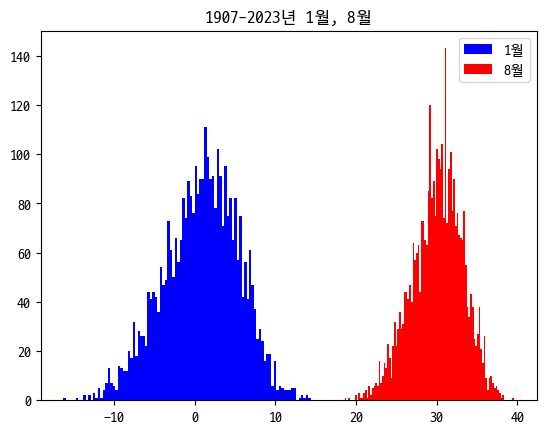

In [8]:
import csv
import matplotlib.pyplot as plt

file = open('seoulTemp.csv','r', encoding='utf-8')

data = csv.reader(file, delimiter=',')
header = next(data)

jan = []
aug = []

for row in data :
    if row[-1] != '' : # 최고기온 데이더가 존재할 때만
        row[0] = row[0].replace('\t','')
        if row[0].split('-')[1] == '01' : # 1월의 경우
            jan.append(float(row[-1]))
        if row[0].split('-')[1] == '08' :
            aug.append(float(row[-1]))

file.close()

plt.rcParams['font.family'] ='D2Coding'
plt.title('1907-2023년 1월, 8월')
plt.hist(jan, color='b', label='1월', bins = 100)
plt.hist(aug, color='r', label='8월', bins = 100)

plt.legend()

print(len(jan), len(aug))

print(aug)

plt.show()


문제) 2023년 서울 1월과 8월  기온 분포도를 boxplot 차트로 표현하세요(평균 기온을 기준으로)

[-0.2, -4.5, -5.0, -1.8, -1.6, 0.6, 1.5, 1.3, 3.1, 1.6, 2.6, 5.9, 8.3, 6.6, -0.2, -4.6, -3.7, -1.9, -0.4, -3.3, -4.5, -0.6, -0.8, -14.7, -11.3, -6.0, -7.3, -6.0, -1.8, -0.9, 2.4] [29.9, 29.7, 29.5, 30.0, 30.3, 29.8, 30.4, 30.9, 28.3, 22.2, 23.5, 23.3, 27.0, 28.1, 28.6, 27.3, 28.2, 29.1, 29.1, 28.3, 29.5, 27.6, 24.8, 25.1, 26.5, 26.4, 26.1, 22.7, 23.9, 22.8, 23.9]


C:\Users\802-01\AppData\Local\Temp\ipykernel_21496\1254719756.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([jan, aug], labels=['1월', '8월'])


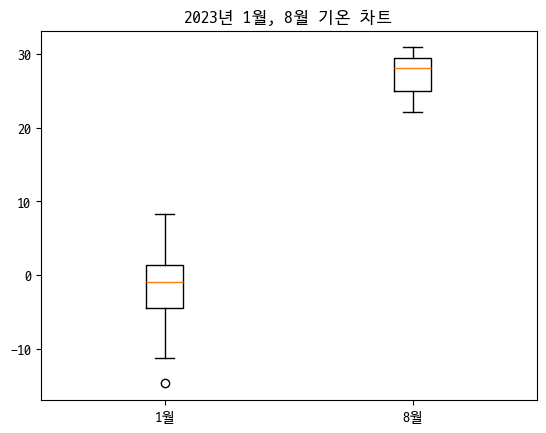

23
23


In [33]:
import csv
import matplotlib.pyplot as plt

file = open('seoulTemp.csv','r', encoding='utf-8')

data = csv.reader(file, delimiter=',')
header = next(data)

jan = []
aug = []

for row in data :
        if row[2] != '' : # 평균기온 데이더가 존재할 때만
            row[0] = row[0].replace('\t','')
            if row[0].split('-')[0] == '2023' : 
                if row[0].split('-')[1] == '01' : # 1월의 경우
                    jan.append(float(row[2]))
                if row[0].split('-')[1] == '08' :
                    aug.append(float(row[2]))
            
file.close()
print(jan, aug)
plt.rcParams['font.family'] ='D2Coding'
plt.title('2023년 1월, 8월 기온 차트')
plt.boxplot([jan, aug], labels=['1월', '8월'])



plt.show()

for i in range(len(jan)):
     if jan[i] == -14.7 :
          print(i)

print(jan.index(min(jan)))

2023년 1월 차트에 동그라미가 하나 그려져 있는데 위 데이터는 2023년 1월 평균 기온 분포보다 데이터의 범위가 다른 이상치이다.

데이터 분석이나 머신러닝 할 때, 이상치와 결측치를 제거하여 분석하기도 한다.